In [70]:
from neuron import h
from neuron.units import ms, mV, µm
import matplotlib.pyplot as plt

In [71]:
h.load_file("stdrun.hoc")

1.0

In [72]:
class BallAndStick:
    def __init__(self, gid):
        self._gid = gid
        self._setup_morphology()
        self._setup_biophysics()

    def _setup_morphology(self):
        self.soma = h.Section(name="soma", cell=self)
        self.dend = h.Section(name="dend", cell=self)
        self.dend.connect(self.soma)
        self.all = self.soma.wholetree()
        self.soma.L = self.soma.diam = 12.6157 * µm
        self.dend.L = 200 * µm
        self.dend.diam = 1 * µm

    def _setup_biophysics(self):
        for sec in self.all:
            sec.Ra = 100  # Axial resistance in Ohm * cm
            sec.cm = 1  # Membrane capacitance in micro Farads / cm^2
        self.soma.insert("hh")
        for seg in self.soma:
            seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
            seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
            seg.hh.gl = 0.0003  # Leak conductance in S/cm2
            seg.hh.el = -54.3 * mV  # Reversal potential
        # Insert passive current in the dendrite                       # <-- NEW
        self.dend.insert("pas")  # <-- NEW
        for seg in self.dend:  # <-- NEW
            seg.pas.g = 0.001  # Passive conductance in S/cm2        # <-- NEW
            seg.pas.e = -65 * mV  # Leak reversal potential             # <-- NEW

    def __repr__(self):
        return "BallAndStick[{}]".format(self._gid)


my_cell = BallAndStick(0)

In [73]:
stim = h.IClamp(my_cell.dend(1))

In [74]:
stim.delay = 5
stim.dur = 1
stim.amp = 0.1

In [75]:
soma_v = h.Vector().record(my_cell.soma(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

In [76]:
h.finitialize(-65 * mV)

1.0

In [77]:
h.continuerun(25 * ms)

0.0

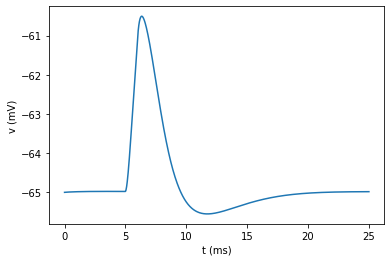

In [78]:
plt.plot(t,soma_v)
plt.xlabel("t (ms)")
plt.ylabel("v (mV)")
plt.show()

Fig. 6.

In [296]:
soma=h.Section(name='soma')

In [297]:
soma.insert('hh')

soma

In [298]:
soma(0.5).hh.gnabar=70.7
soma(0.5).hh.m=0.98

In [305]:
soma.psection()

{'point_processes': {},
 'density_mechs': {'hh': {'gnabar': [70.7],
   'gkbar': [0.036],
   'gl': [0.0003],
   'el': [-54.3],
   'gna': [0.08630682571698998],
   'gk': [0.02941673751732253],
   'il': [0.021566229034737205],
   'm': [0.9931720782801804],
   'h': [0.0012432282843783486],
   'n': [0.9506008653536293]}},
 'ions': {'na': {'ena': [50.0],
   'nai': [10.0],
   'nao': [140.0],
   'ina': [-2.7974260200362107],
   'dina_dv_': [0.0863068257173083]},
  'k': {'ek': [-77.0],
   'ki': [54.4],
   'ko': [2.5],
   'ik': [2.7824536041543033],
   'dik_dv_': [0.02941673751744034]}},
 'morphology': {'L': 100.0,
  'diam': [500.0],
  'pts3d': [],
  'parent': None,
  'trueparent': None},
 'nseg': 1,
 'Ra': 35.4,
 'cm': [1.0],
 'regions': set(),
 'species': set(),
 'name': 'soma',
 'hoc_internal_name': '__nrnsec_000001a917504f10',
 'cell': None}

In [300]:
i=h.Vector().record(soma(0.5).hh._ref_gna)
t=h.Vector().record(h._ref_t)

In [301]:
h.load_file("stdrun.hoc")

1.0

In [302]:
h.finitialize(-109 * mV)

1.0

In [303]:
h.continuerun(11 * ms)

0.0

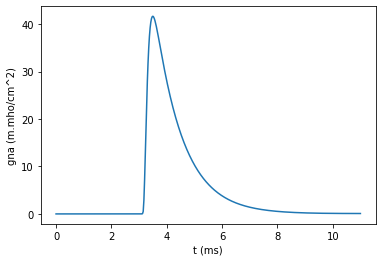

In [304]:
plt.plot(t,i)
plt.xlabel("t (ms)")
plt.ylabel("gna (m.mho/cm^2)")
plt.show()